In [4]:
library(readxl)
library(MASS)
library(magrittr)
library(tidyverse)

# Reading CSV's

In [5]:
# Use read.csv and read_csv to read the files "data/foo.csv"
# Note two differences: 
# 1. The information read_csv gives about the type of each column
# 2. The difference in the type of the baz column (how do you get the
# type of a column in a dataframe?)
f_oo <- read_csv("data/foo.csv")
f.oo <- read.csv("data/foo.csv")
str(f_oo)

Parsed with column specification:
cols(
  foo = col_double(),
  bar = col_double(),
  baz = col_character()
)


Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	3 obs. of  3 variables:
 $ foo: num  1 2 0.01
 $ bar: num  2 0 NA
 $ baz: chr  "hello" "hey" "hi"
 - attr(*, "spec")=List of 2
  ..$ cols   :List of 3
  .. ..$ foo: list()
  .. .. ..- attr(*, "class")= chr  "collector_double" "collector"
  .. ..$ bar: list()
  .. .. ..- attr(*, "class")= chr  "collector_double" "collector"
  .. ..$ baz: list()
  .. .. ..- attr(*, "class")= chr  "collector_character" "collector"
  ..$ default: list()
  .. ..- attr(*, "class")= chr  "collector_guess" "collector"
  ..- attr(*, "class")= chr "col_spec"


In [6]:
f.oo <- read.csv("data/foo.csv")
str(f.oo)

'data.frame':	3 obs. of  3 variables:
 $ foo: num  1 2 0.01
 $ bar: num  2 0 NA
 $ baz: Factor w/ 3 levels "hello","hey",..: 1 2 3


# Transforming Data

In [7]:
# Read the data from the file 'data/oesm10in4/nat3d_M2010_dl.xls'
# using read_excel to create a tibble. 
# Notice that in Jupyter Notebooks, pressing TAB will give you
# autocomplete help with the filename
dataset <- read_excel("data/nat3d_M2010_dl.xls")

In [8]:
# In Jupyter Notebooks, you will need to explicitly use the
# print() function in order to see the tibble-specific info.
# Try printing the dataframe you read in. Try to understand
# the types of the different columns. Are these the types
# that make sense for the column? 
print(dataset)

# A tibble: 19,289 x 24
   NAICS  NAICS_TITLE  OCC_CODE OCC_TITLE      GROUP TOT_EMP EMP_PRSE PCT_TOTAL
   <chr>  <chr>        <chr>    <chr>          <chr> <chr>   <chr>    <chr>    
 1 113000 Forestry an… 00-0000  Industry Total total 49070   1.39999… 100      
 2 113000 Forestry an… 11-0000  Management Oc… major 870     10.3000… 1.77     
 3 113000 Forestry an… 11-1021  General and O… <NA>  760     11.1999… 1.55     
 4 113000 Forestry an… 13-0000  Business and … major 260     22.1999… 0.520000…
 5 113000 Forestry an… 13-1023  Purchasing Ag… <NA>  140     38.2999… 0.280000…
 6 113000 Forestry an… 13-2011  Accountants a… <NA>  60      23.8999… 0.13     
 7 113000 Forestry an… 19-0000  Life, Physica… major 540     26.6000… 1.110000…
 8 113000 Forestry an… 19-1032  Foresters      <NA>  460     24.8000… 0.939999…
 9 113000 Forestry an… 19-4093  Forest and Co… <NA>  **      **       **       
10 113000 Forestry an… 33-0000  Protective Se… major 160     38.2000… 0.320000…
# ... with 19,27

In [9]:
# Change the type of the NAICS columns to a factor
dataset <- dataset %>% mutate(NAICS = parse_factor(NAICS,NULL))
class(dataset$NAICS)

[1] "factor"

In [10]:
# Now try and get the 15 most common NAICS codes, as a vector
commons <- dataset %>% group_by(NAICS) %>% summarize(count = n()) %>% arrange(desc(count))
commons <- commons[[1]][1:15]
commons

[1] 999000 561000 611000 541000 551000 622000 423000 813000 621000 424000
[11] 624000 336000 238000 713000 339000
88 Levels: 113000 115000 211000 212000 213000 221000 236000 237000 ... 999000

In [11]:
# Filter your data to include only the 15 most common NAICS codes
# hint: take a look at the %in% infix operator
clean_data <- dataset %>% filter(NAICS %in% commons) 
clean_data

NAICS,NAICS_TITLE,OCC_CODE,OCC_TITLE,GROUP,TOT_EMP,EMP_PRSE,PCT_TOTAL,PCT_RPT,H_MEAN,⋯,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
238000,Specialty Trade Contractors,00-0000,Industry Total,total,3566700,0.20000000000000001,100,100,22.129999999999999,⋯,18.75,27.300000000000001,37.310000000000002,22460,28940,39000,56780,77600,NA,NA
238000,Specialty Trade Contractors,11-0000,Management Occupations,major,139410,0.90000000000000002,3.9100000000000001,18,51.479999999999997,⋯,43.170000000000002,62,#,50790,66040,89800,128960,#,NA,NA
238000,Specialty Trade Contractors,11-1011,Chief Executives,NA,7460,2.3999999999999999,0.20999999999999999,1,80.560000000000002,⋯,74.609999999999999,#,#,69380,101650,155200,#,#,NA,NA
238000,Specialty Trade Contractors,11-1021,General and Operations Managers,NA,66520,1.3,1.8700000000000001,13,53.530000000000001,⋯,45.049999999999997,65.230000000000004,#,51030,67370,93700,135680,#,NA,NA
238000,Specialty Trade Contractors,11-2021,Marketing Managers,NA,220,14.6,0.01,~,54.57,⋯,49.43,60.969999999999999,#,58410,82420,102820,126810,#,NA,NA
238000,Specialty Trade Contractors,11-2022,Sales Managers,NA,800,8.4000000000000004,0.02,~,61.340000000000003,⋯,54.310000000000002,72.980000000000004,#,63200,82050,112950,151790,#,NA,NA
238000,Specialty Trade Contractors,11-3011,Administrative Services Managers,NA,820,10.5,0.02,~,39.289999999999999,⋯,37.039999999999999,45.020000000000003,61.329999999999998,39420,58530,77050,93650,127570,NA,NA
238000,Specialty Trade Contractors,11-3021,Computer and Information Systems Managers,NA,210,13.9,0.01,~,52.299999999999997,⋯,49.18,62.600000000000001,79.819999999999993,68480,82140,102300,130210,166030,NA,NA
238000,Specialty Trade Contractors,11-3031,Financial Managers,NA,5360,4.0999999999999996,0.14999999999999999,1,48.390000000000001,⋯,42.869999999999997,58.210000000000001,79.370000000000005,52950,67120,89170,121080,165080,NA,NA
238000,Specialty Trade Contractors,11-3051,Industrial Production Managers,NA,300,12.4,0.01,~,44.030000000000001,⋯,37.75,51.560000000000002,74.739999999999995,43380,58950,78530,107250,155450,NA,NA


In [12]:
# Create a function that you can use with summarize()
# This function should select the nth largest value in the given column/group
# hint: the function should take a vector and return a scalar

get_largest <- function(vals, n) {
    orderd_vals <- vals[order(vals, decreasing = T)]
    orderd_vals[n]
}

get_largest(dataset$A_MEDIAN,5)

# use your function on one of the columns (i.e. A_MEDIAN)
max(dataset$A_MEDIAN) == get_largest(dataset$A_MEDIAN, 1)

# use your function on one of the columns (i.e. A_MEDIAN)

[1] "99850"

[1] TRUE

In [13]:
# Create another function that you can use with summarize. This one should: 

# fit a Cauchy distribution via ML to the given values, 
# i.e.: fitdistr(x, "cauchy")

# take a second parameter, "param", which should control which
# parameter of cauchy distribution is returned
# param should be one of the following character values: {"location", "scale"}
# hint: you will need to get rid of NA values!

get_cauchy <- function(vals, param) {
    clean_vals <- vals[!is.na(vals)]
    fit <- fitdistr(clean_vals, "cauchy")
    fit$estimate[param]
} 

In [14]:
# Test your previous function!

out <- get_cauchy(rnorm(300, 100, 20), "location")
stopifnot(round(out, -1) == 100)

# Plotting

Warning message:
“58 parsing failures.
row # A tibble: 5 x 4 col     row   col expected   actual expected   <int> <int> <chr>      <chr>  actual 1     3    NA an integer #      row 2   179    NA an integer *      col 3   210    NA an integer *      expected 4   213    NA an integer *      actual 5   233    NA an integer #     
... ................. ... ............................... ........ ............................... ...... ............................... ... ............................... ... ............................... ........ ............................... ...... ...............................
See problems(...) for more details.
”Warning message:
“Removed 58 rows containing non-finite values (stat_density).”

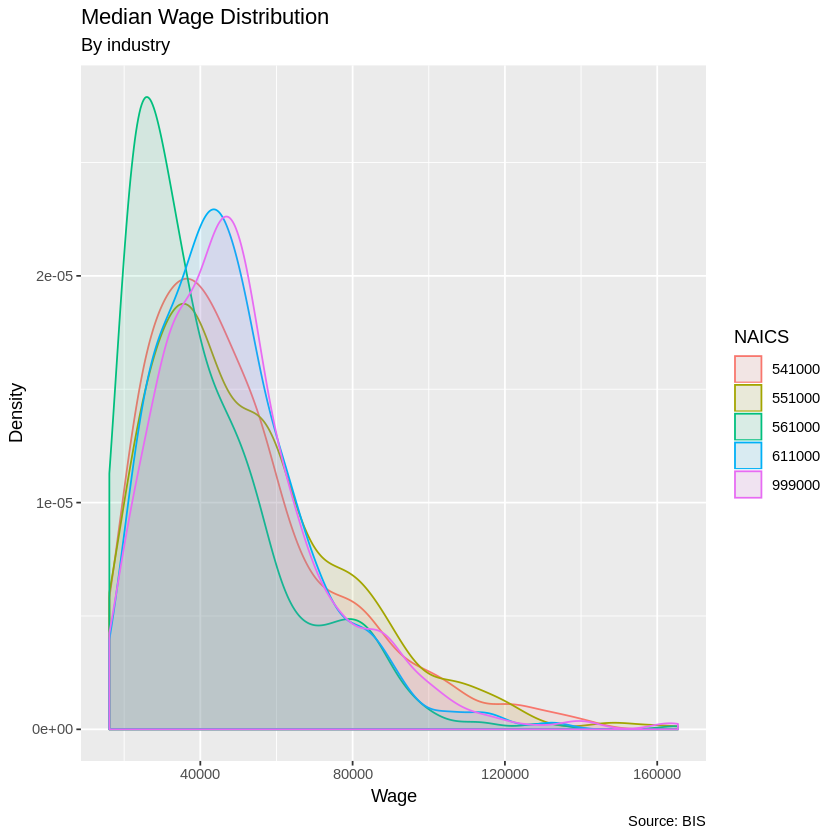

In [18]:
# Use ggplot2 to plot a kernel-density estimate of the wage distribution (given by A_MEDIAN)
# for each NAICS code.

clean_data %>% filter(NAICS %in% commons[1:5]) %>% 
        mutate(A_MEDIAN = parse_integer(A_MEDIAN)) %>% group_by(NAICS) %>%
            ggplot(aes(A_MEDIAN,colour=NAICS,fill=NAICS)) + geom_density(alpha = 0.1) +
                labs(title="Median Wage Distribution", subtitle="By industry", x="Wage", y="Density", caption="Source: BIS")